In [ ]:
# 라이브러리 로드
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/bank-data.csv')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [ ]:
# 카테고리형 변수들 labeling encoding

df['job'] = df['job'].astype('category').cat.codes
df['marital'] = df['marital'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['default'] = df['default'].astype('category').cat.codes
df['housing'] = df['housing'].astype('category').cat.codes
df['loan'] = df['loan'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes
df['day_of_week'] = df['day_of_week'].astype('category').cat.codes
df['poutcome'] = df['poutcome'].astype('category').cat.codes
df['y'] = df['y'].astype('category').cat.codes

df

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...         1    999         0         1           1.1   
1                1  ...         1    999         0         1           1.1   
2                1  ...         1    999         0         1           1.1   
3                1  ...         1    999         0         1           1.1   
4                1  ...         1    999         0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            0  ...         1    999         0         1          -1.1   
41184            0  ...         1    999         0         1          -1.1   
41185            0  ...         2    999         0         1          -1.1   
41186            0  ...         1    999         0         1          -1.1   
41187            0  ...         3    999         1         0          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41183          94.767          -50.8      1.028       4963.6  1  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  
41187          94.767          -50.8      1.028       4963.6  0  

[41188 rows x 21 columns]

In [ ]:
data = df.drop(['y'], axis = 1)
target = df['y']

In [ ]:
seed = 5764

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.7, random_state=seed)

# 의사결정나무 모델 구축 (Classification Tree)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=5764)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=5764)

In [ ]:
names = ['No', 'Yes']

In [ ]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = names, feature_names = data.columns, impurity=True, filled=True)

In [ ]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


# 의사결정나무 모델 테스트

In [ ]:
y_pred = dt_clf.predict(x_test) 

In [ ]:

# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.8894630965593785 

Accuracy:  0.89 

Recall:  0.52 

Precision:  0.51 

F1_score:  0.51 

Confusion Matrix: 
 [[23958  1618]
 [ 1569  1687]]


# Cross Validation

In [ ]:
# 교차검증

x = data
y = target

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.43931352332453333


In [ ]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

fit_time  score_time  test_score
0  0.190640    0.004350    0.888687
1  0.156438    0.003937    0.363195
2  0.182793    0.003999    0.620660
3  0.206279    0.003971    0.182469
4  0.181893    0.003796    0.141556

In [ ]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.8894630965593785

# 가지치기 수행 (Pruning phase)

In [ ]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) 
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


Accuracy of training set: 0.905
Accuracy of test set: 0.904


In [ ]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = names, feature_names = data.columns, impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


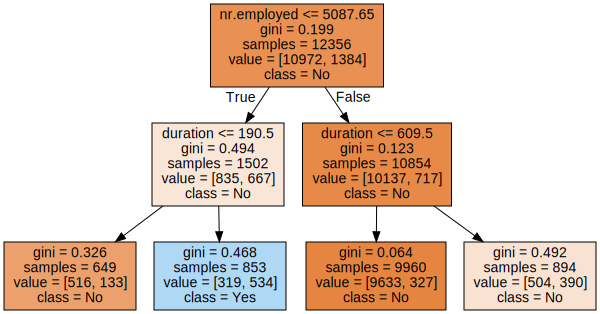

In [ ]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
df[['nr.employed', 'duration']]

nr.employed  duration
0           5191.0       261
1           5191.0       149
2           5191.0       226
3           5191.0       151
4           5191.0       307
...            ...       ...
41183       4963.6       334
41184       4963.6       383
41185       4963.6       189
41186       4963.6       442
41187       4963.6       239

[41188 rows x 2 columns]

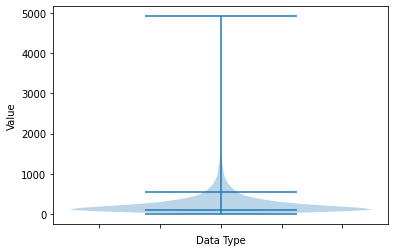

In [ ]:
fig, ax = plt.subplots()

violin = ax.violinplot([df['duration']], quantiles=[[0.25, 0.9]])
ax.set_xticklabels(['duration'])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

In [ ]:
dff = df['duration'] > 750

len(dff[dff == True].index)

2064

In [ ]:
indexDue = df[dff == True].index
df.drop(indexDue, inplace = True)

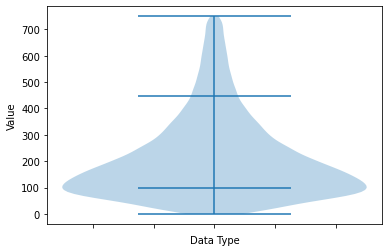

In [ ]:
fig, ax = plt.subplots()

violin = ax.violinplot([df['duration']], quantiles=[[0.25, 0.9]])
ax.set_xticklabels(['duration'])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

In [ ]:
data = df.drop(['y'], axis = 1)
target = df['y']

In [ ]:
seed = 5764

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.7, random_state=seed)

# -------------------극단값 제거 후---------------------

# 의사결정나무 모델 구축 (Classification Tree)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=5764)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=5764)

In [ ]:
names = ['No', 'Yes']

In [ ]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = names, feature_names = data.columns, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


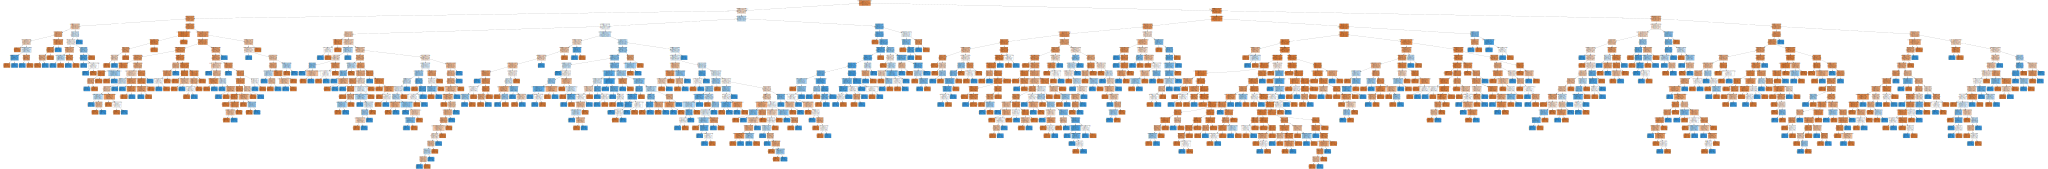

In [ ]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 의사결정나무 모델 테스트

In [ ]:
y_pred = dt_clf.predict(x_test) 

In [ ]:

# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9061598568663964 

Accuracy:  0.91 

Recall:  0.49 

Precision:  0.48 

F1_score:  0.49 

Confusion Matrix: 
 [[23599  1322]
 [ 1248  1218]]


# Cross Validation

In [ ]:
# 교차검증

x = data
y = target

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.44350461266064284


In [ ]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

fit_time  score_time  test_score
0  0.104223    0.003705    0.910415
1  0.182436    0.007374    0.371629
2  0.193166    0.004074    0.630927
3  0.185041    0.003739    0.186581
4  0.151061    0.003639    0.117970

In [ ]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9061598568663964

# 가지치기 수행 (Pruning phase)

In [ ]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=5, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


Accuracy of training set: 0.937
Accuracy of test set: 0.931


In [ ]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = names, feature_names = data.columns, impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


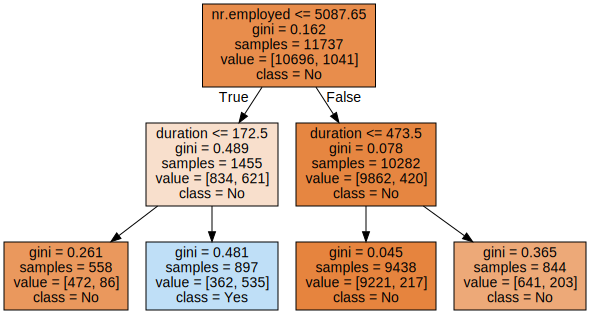

In [ ]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)